In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [6]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,199999.000000,199999.000000
mean,-72.525292,39.923890
std,13.117408,6.794829
min,-3356.666300,-881.985513
25%,-73.991407,40.733823
50%,-73.980093,40.753042
75%,-73.963658,40.768001
max,1153.572603,872.697628


In [9]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [12]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [13]:
df = df[df['fare_amount'] > 0]

In [14]:
df.shape

(199978, 7)

In [15]:
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 8)]

In [16]:
df.shape

(199268, 7)

In [17]:
df['distance-km'] = (np.abs(df['pickup_longitude'] - df['dropoff_longitude']) + 
                            np.abs(df['pickup_latitude'] - df['dropoff_latitude'])) * 111 

In [18]:
df['fare_amount_per_km'] = df['fare_amount'] / (df['distance-km'] + 1e-5)

In [19]:
import seaborn as sns

<Axes: >

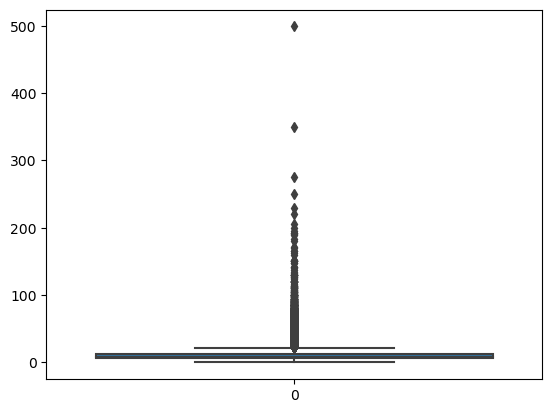

In [20]:
sns.boxplot(df['fare_amount'])

In [21]:
cols=['fare_amount','passenger_count','distance-km', 'fare_amount_per_km']

In [22]:
def conv(df,cols):
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [23]:
df=conv(df,cols)

<Axes: >

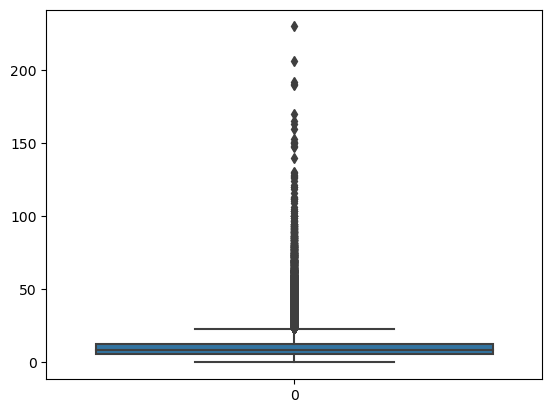

In [24]:
sns.boxplot(df['fare_amount'])

In [25]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance-km', 'fare_amount_per_km'],
      dtype='object')

<Axes: >

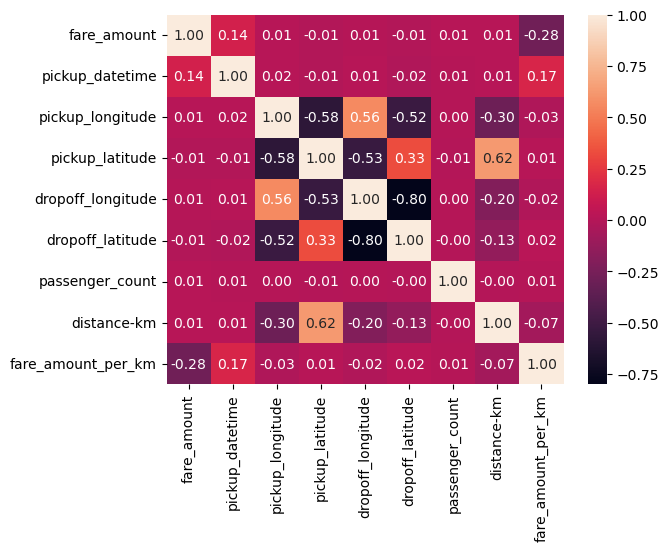

In [26]:

correleation=df.corr()
sns.heatmap(correleation,annot=True,fmt='0.2f')

In [27]:
df['hour_of_day'] = df['pickup_datetime'].dt.hour  
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

In [28]:
df.drop(columns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],inplace=True)

<Axes: >

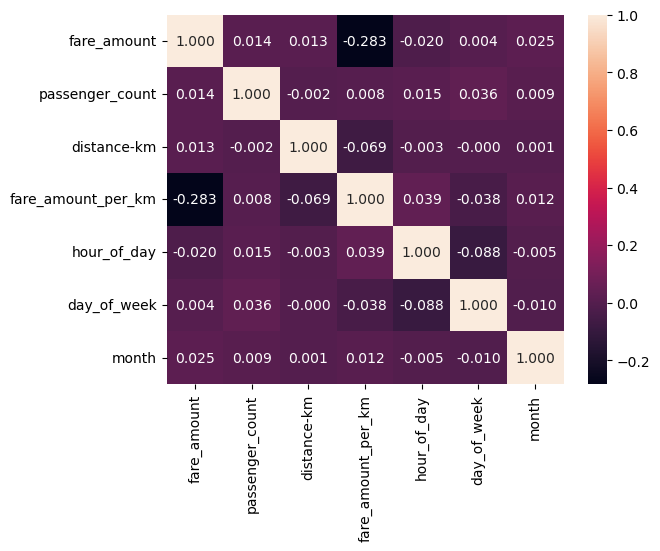

In [29]:
newcorr=df.corr()
sns.heatmap(newcorr,annot=True,fmt='0.3f')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
scaler=StandardScaler()

In [32]:
x=df.drop(columns='fare_amount')
x

,passenger_count,distance-km,fare_amount_per_km,hour_of_day,day_of_week,month
0,1,1.714050,4.375575,19,3,5
1,1,2.492505,3.089249,20,4,7
2,1,8.253405,1.562989,21,0,8
3,3,2.587743,2.048109,8,4,6
4,5,7.239531,2.210085,17,3,8
...,...,...,...,...,...,...
199993,1,3.331776,2.851324,19,5,9
199996,1,2.745363,2.731869,1,4,3
199997,2,21.196449,1.457791,0,0,6
199998,1,4.877930,2.972566,14,2,5


In [33]:
y=df['fare_amount']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr=r2_score(y_test, y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression MSE: 85.57790256373085
Linear Regression R2: 0.07909907223733048
Linear Regression RMSE: 9.250832533546959


In [39]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')
r2_r=r2_score(y_test, y_pred_ridge)
rmse_r=np.sqrt(mse_ridge)
print(f'Ridge Regression R2: {r2_r}')
print(f'Ridge Regression RMSE: {rmse_r}')

Ridge Regression MSE: 85.57790277448197
Ridge Regression R2: 0.07909906996944471
Ridge Regression RMSE: 9.250832544937886


In [53]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')
r2_l=r2_score(y_test, y_pred_lasso)
rmse_l=root_mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression R2: {r2_l}')
print(f'Lasso Regression RMSE: {rmse_l}')

Lasso Regression MSE: 86.6894744149442
Lasso Regression R2: 0.06713748497717398
Lasso Regression RMSE: 9.310718254514214
